In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tkinter import filedialog
from tkinter import Tk

---
# **Importando uma base de dados**

In [6]:
# Seleciona um arquivo
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Escolha um arquivo CSV", filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))) #Tipo de arquivo

# Verifica se um arquivo foi selecionado
if file_path:
    df = pd.read_csv(file_path, sep=',') #Sempre verificar o separador
    print(f"Arquivo '{file_path}' carregado com sucesso!")
else:
    print("Nenhum arquivo selecionado.")


Arquivo 'D:/GitHub/ml-playground/EDA/DisneyMovies/disney_movies.csv' carregado com sucesso!


---
# **Visualizando os Dados**

In [7]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [9]:
df.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [10]:
linhas, colunas = df.shape
print(f"Linhas: {linhas:,}\nColunas:{colunas:,}")

Linhas: 579
Colunas:6


---
# **Data Preparation**

- Alterar nomes de colunas

---
# **EDA**

1. Verificando os tipos de dados

In [11]:
contagem_tipos = df.dtypes.value_counts().to_dict()
resumo = ", ".join([f"{contagem} colunas do tipo {tipo}" for tipo, contagem in contagem_tipos.items()])
print(resumo)

4 colunas do tipo object, 2 colunas do tipo int64


In [ ]:
print("Mais detalhes sobre as colunas:\n")

informacoes_colunas = pd.DataFrame({
    'Tipo de Dado': df.dtypes,
    'Contagem nao nulos': df.count(),
    'Contagem nulos': df.isnull().sum(),
    'Porcentagem nulos': (df.isnull().sum() / len(df) * 100).round(2),
    'Valores unicos': df.nunique(),
    'Porcentagem cardinalidade' : (df.nunique() / len(df) *100).round(2)
})

print(informacoes_colunas)


Mais detalhes sobre as colunas:

                         Tipo de Dado  Contagem nao nulos  Contagem nulos  \
movie_title                    object                 579               0   
release_date                   object                 579               0   
genre                          object                 562              17   
mpaa_rating                    object                 523              56   
total_gross                     int64                 579               0   
inflation_adjusted_gross        int64                 579               0   

                          Porcentagem nulos  Valores unicos  
movie_title                            0.00             573  
release_date                           0.00             553  
genre                                  2.94              12  
mpaa_rating                            9.67               5  
total_gross                            0.00             576  
inflation_adjusted_gross               0.00            

In [13]:
porcentagem_nulos_alta = informacoes_colunas[informacoes_colunas['Porcentagem nulos'] > 25].index.tolist() # Porcentagem de valores Nulos
if porcentagem_nulos_alta:
    print(f"Colunas com altas taxas de valores nulos: {', '.join(porcentagem_nulos_alta)}")

In [14]:
valor_unico = informacoes_colunas[informacoes_colunas['Valores unicos'] == 1].index.tolist()
if valor_unico:
    print(f"Colunas com um único valor: {', '.join(valor_unico)}")

In [ ]:
porcentagem_cardinalidade_alta = informacoes_colunas[informacoes_colunas['Porcentagem cardinalidade'] > 90].index.tolist()
if porcentagem_cardinalidade_alta:
    print(f"Colunas com altas taxas de cardinalidade: {', '.join(porcentagem_cardinalidade_alta)}")

2. Analizando os valores nulos

In [15]:
total_celulas = np.prod(df.shape)
total_nulos = df.isnull().sum().sum()
porcentagem_nulos = (total_nulos/total_celulas) * 100

print(f"Visão geral: {total_nulos} valores nulos de {total_celulas} células, sendo {porcentagem_nulos:.2f}% do total.")

Visão geral: 73 valores nulos de 3474 células, sendo 2.10% do total.


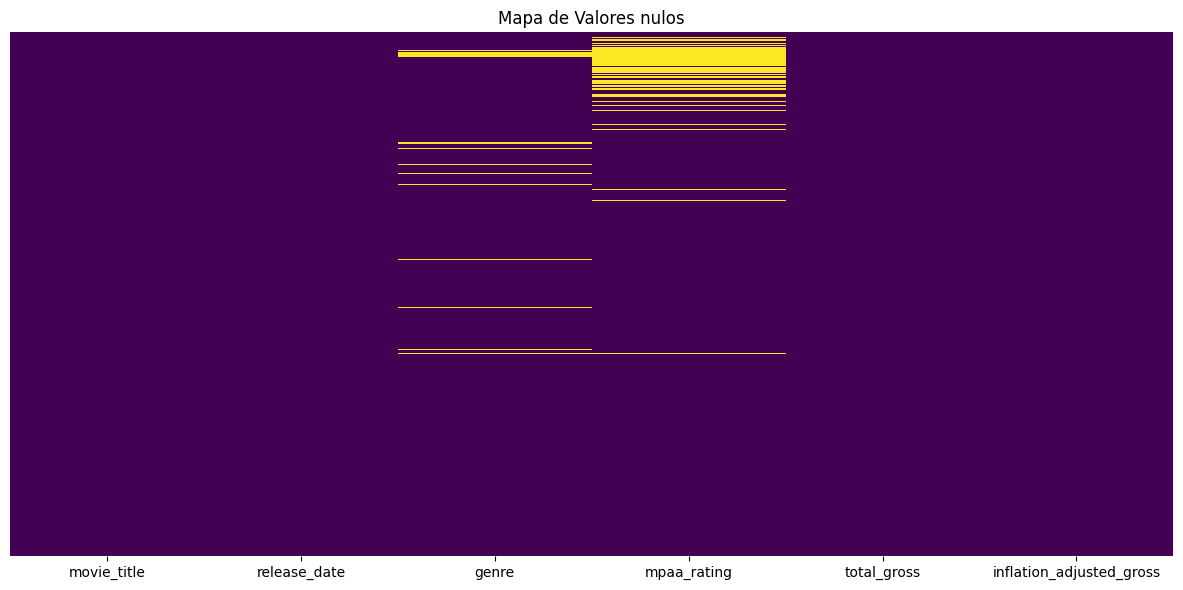

Colunas com dados nulos: genre, mpaa_rating


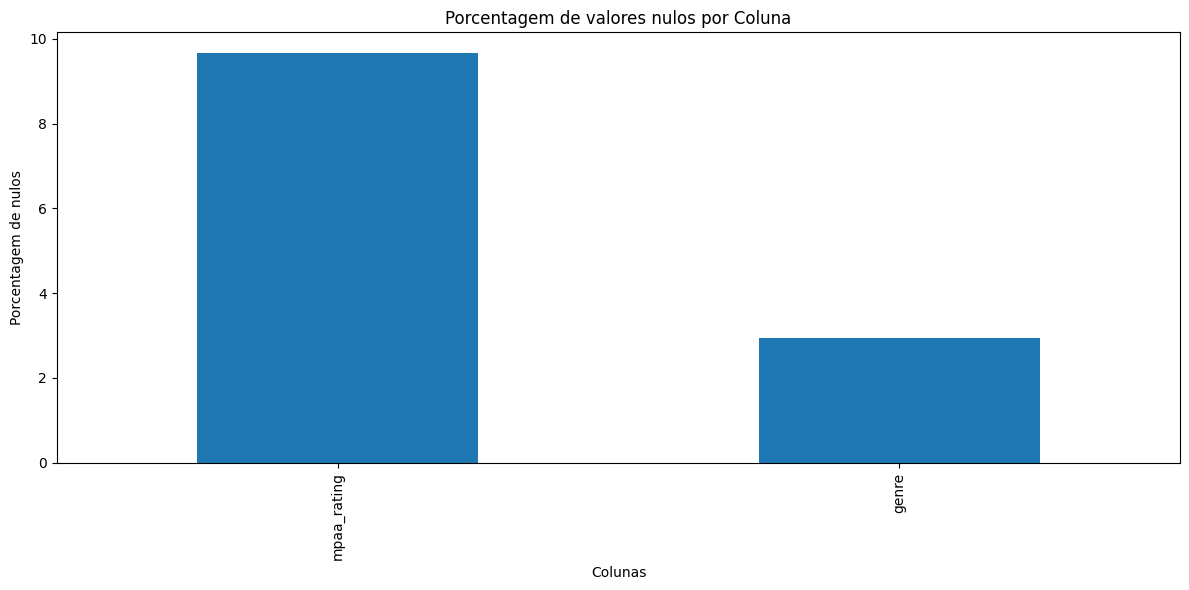

,Contagem de nulos,Porcentagem de nulos
mpaa_rating,56,9.67
genre,17,2.94


In [16]:
if total_nulos > 0:
    #plotar um gráfico de nulos
    plt.figure(figsize=(12,6))
    ax = sns.heatmap(df.isnull(), cbar = False, cmap = "viridis", yticklabels = False)
    plt.title("Mapa de Valores nulos")
    plt.tight_layout()
    plt.show()

    colunas_nulos = df.columns[df.isnull().any()].tolist()
    print(f"Colunas com dados nulos: {', '.join(colunas_nulos)}")

    dados_nulos = pd.DataFrame({
        'Contagem de nulos': df.isnull().sum(),
        'Porcentagem de nulos': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Porcentagem de nulos', ascending=False)

    dados_nulos = dados_nulos[dados_nulos['Contagem de nulos'] > 0]

    plt.figure(figsize = (12,6))
    ax = dados_nulos['Porcentagem de nulos'].plot(kind='bar')
    plt.title('Porcentagem de valores nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Porcentagem de nulos')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    display(dados_nulos)

else:
    print(f"Não foram encontrados valores nulos!")

3. Verificando se existe registros duplicados

In [17]:
contagem_duplicados =  df.duplicated().sum()

if contagem_duplicados > 0:
    porcentagem_duplicados = (contagem_duplicados / len(df)) * 100
    print(f"Foi encontrado {contagem_duplicados} registros duplicados, o que corresponde a {porcentagem_duplicados:.2f} do total de registros")
else: 
    print("Não foi encontrado registros duplicados no dataset.")

Não foi encontrado registros duplicados no dataset.


4. Inferindo tipos de dados

In [ ]:
def inferir_tipos_colunas(df):
    col_numericas = []
    col_categorias = []
    col_datetime = []
    col_text = []
    col_id = []

    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            col_datetime.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if("id" in col.lower() or col.lower().endwith("_id") and df[col].nunique() > 0.8 *len(df)):
                col_id.append(col)
            else: 
                col_numericas.append(col)
        elif pd.api.types.is_object_dtype(df[col]):
            sample = df[col].dropna().sample(min(10, len(df[col].dropna()))).astype(str)
            avg_len = sample.str.len().mean()
            max_len = sample.str.len().max()
            unique_ratio = df[col].nunique() / len(df[col].dropna())
            if ('id' in col.lower() or col.lower().endswith('_id')) and unique_ratio > 0.8:
                    col_id.append(col)
            elif avg_len > 50 or (max_len > 100 and unique_ratio > 0.9):
                col_text.append(col)
            else:
                col_categorias.append(col)

    return {
        'numerica': col_numericas,
        'categorica': col_categorias,
        'datetime': col_datetime,
        'textual': col_text,
        'id': col_id
    }

    tipos_colunas = inferir_tipos_colunas(df)

In [ ]:
for tipo, cols in tipos_colunas.items():
    if cols:
        print(f"**{tipo.capitalize()} columns ({len(cols)})**: {', '.join(cols)}")

5. Verificando inconsistências ou possíveis problemas

In [ ]:
def verificar_consistencia_dados(df):
    problemas = []

    for col in tipos_colunas['numerica']:
        if df[col].dtype in [np.int64, np.int32, np.float64, np.float32]:
            if df[col].isnull().sum() > 0.5 * len(df):
                continue
            # verifica outliers usando o método IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            menor_suspeito = Q1 - 1.5 * IQR
            maior_suspeito = Q3 + 1.5 * IQR

            outliers = df[(df[col] < menor_suspeito) | (df[col] > maior_suspeito)]
            porcentagem_outliers = len(outliers) / len(df) * 100
        
            if porcentagem_outliers > 5:
                issues.append(f"Coluna '{col}' tem {porcentagem_outliers:.2f}% de possíveis outliers"
                             f"(outside range: {menor_suspeito:.2f} to {maior_suspeito:.2f})")

            indicadores_quantidade = ['amount', 'count', 'qty', 'quantity', 'price', 'age', 'weight', 'height']
            if any(indicador in col.lower() for indicador in indicadores_quantidade):
                neg_values = (df[col] < 0).sum()
                if neg_values > 0:
                    issues.append(f"Coluna '{col}' contém {neg_values} valores negativos, "
                                 f"which might be inappropriate for this type of data.")
    
    for col in tipos_colunas['categorica']:
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
            
        if df[col].nunique() > 1:
            value_counts = df[col].value_counts()
            rare_values = value_counts[value_counts < len(df) * 0.01]
            if len(rare_values) > 0 and len(rare_values) < 0.5 * df[col].nunique():
                issues.append(f"Column '{col}' has {len(rare_values)} rare categories "
                             f"(each <1% of data), which might need grouping.")

        if df[col].dtype == object:
            valores = df[col].dropna().astype(str)
            valores_baixos = valores.str.lower()
            casos_duplicados = valores_baixos.value_counts()[valores_baixos.value_counts() > 1].index

        if len(casos_duplicados) > 0:
            